<a href="https://colab.research.google.com/github/min02choi/Machine-Learning/blob/main/kmean_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans    # 사이킷런에 들어있는 KMeans 패키지
import matplotlib.pyplot as plt
import seaborn as sns     # 시각화
%matplotlib inline

## Create Data Points

In [4]:
df = pd.DataFrame(columns=['x', 'y'])

In [9]:
arr_x = [3, 4, 3, 4, 10, 10, 11, 11, 15, 15, 16, 16]
arr_y = [1, 1, 2, 2, 5, 6, 5, 6, 1, 2, 1, 2]

for i in range(12):
  df.loc[i] = [arr_x[i], arr_y[i]]

In [11]:
df.head(20)   # 차트 형식으로 확인

,x,y
0,3,1
1,4,1
2,3,2
3,4,2
4,10,5
5,10,6
6,11,5
7,11,6
8,15,1
9,15,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(30.299999999999997, 0.5, 'y')

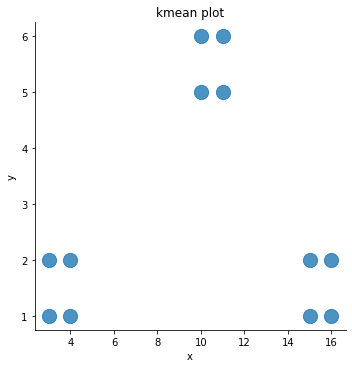

In [15]:
# data point를 시각화
# seaborn의 lm차트 사용: x축, y축, 데이터, 선의 유무, 마커 사이즈(데이터 포인트의 크기)
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 200})

plt.title("kmean plot")   # 표의 제목
plt.xlabel("x")           # x축
plt.ylabel("y")           # y축

## k-mean clustering

In [16]:
data_points = df.values     # dataframe을 numpy array로 변경

In [18]:
kmeans = KMeans(n_clusters=3).fit(data_points)    # 3개의 클러스터가 필요(n_clusters), 데이터를 넘겨줌

In [22]:
# 각각의 데이터에 대한 클러스터 넘버
kmeans.labels_      

array([1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0], dtype=int32)

In [23]:
# 각 클러스터 별 centroids position
kmeans.cluster_centers_

array([[15.5,  1.5],
       [ 3.5,  1.5],
       [10.5,  5.5]])

In [33]:
df['cluster_id'] = kmeans.labels_   # 현재 내 데이터에 클러스터 번호를 'cluster_id'라는 이름으로 붙혀줌

In [34]:
df.head(12)

,x,y,clister_id,cluster_id
0,3,1,1,1
1,4,1,1,1
2,3,2,1,1
3,4,2,1,1
4,10,5,2,2
5,10,6,2,2
6,11,5,2,2
7,11,6,2,2
8,15,1,0,0
9,15,2,0,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After KMean Clustering')

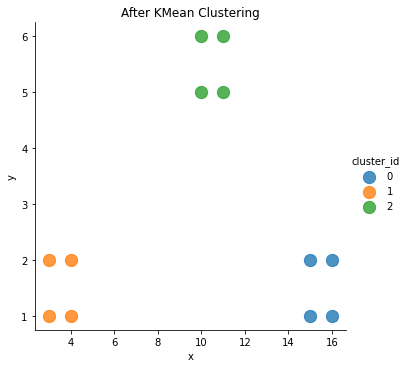

In [36]:
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 150},
           hue='cluster_id')    # 'cluster_id'를 기준으로 색을 구분

plt.title("After KMean Clustering")